<a href="https://colab.research.google.com/github/JAVerduzco/Mexico-s-energy-analysis-2020/blob/main/Cap6_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se comienza con la instalación de ```geopandas```

In [ ]:
!pip install geopandas

Se procede a instalar paquetería ```wget``` , la cual contiene una función para
descargar el contenido dentro de una URL

In [ ]:
!pip install wget

# Adquirir datos

Descargar de Github el archivo zip

In [ ]:
import wget
from zipfile import ZipFile

#URLs Github 
SHP_ROOT = 'https://github.com/JAVerduzco/Mexico-s-energy-analysis-2020/raw/main/'
SHP_FILE =  'MexicoSHP2.zip'

#Damos como argumento el url y descargamos los zipfiles
wget.download(SHP_ROOT+SHP_FILE)

#Creamos un objeto ZipFile mediante el modulo ZipFile el cual le damos
#como argumento nuestro archivo zip, 'r' es un parámetro para indicar 
#que abriremos el zip en modo de lectura (read mode) y haremos referencia
#a este archivo bajo el alias 'zip' ('as zip') 
with ZipFile(SHP_FILE, 'r') as zip:
    #Extraemos todo el contenido del zip con el metodo .extractall()
    print('Extrayendo archivos...')
    zip.extractall()
    print('Extracción finalizada.')

Extrayendo archivos...
Extracción finalizada.


In [ ]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

Accedemos a la carpeta donde se encuentran los archivos descomprimidos.

In [ ]:
os.chdir('MexicoSHP2')

# Shapefile

Un geodataframe guarda información geográfica en una tabla, en donde cada fila representa una geometría, este caso, cada geometría de esta dataframe esta asociado a un estado de la República Mexicana. cada geometría esta dada por una serie de puntos y lineas que finalmente delimitan la estructura de un polígono, esta información se encuentra en la columna ```geometry```.

In [ ]:
fp = 'destdv250k_2gw.shp'
mexico = gpd.read_file(fp)
mexico

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry
0,6.710632,22.081488,2,1,BAJA CALIFORNIA,Mexicali,None,02,"POLYGON ((-116.15195 32.61459, -116.13523 32.6..."
1,16.687178,36.642330,3,2,SONORA,Hermosillo,None,26,"POLYGON ((-114.81361 32.49456, -114.81306 32.4..."
2,0.000045,0.032972,4,3,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.29441 32.43412, -117.29514 32.4..."
3,0.000004,0.008558,5,4,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.26293 32.42339, -117.26320 32.4..."
4,0.000012,0.021596,6,5,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.25951 32.41480, -117.25991 32.4..."
...,...,...,...,...,...,...,...,...,...
1208,0.000498,0.098991,1210,1209,CHIAPAS,None,ISLA,07,"POLYGON ((-92.82037 15.16438, -92.82115 15.164..."
1209,0.000049,0.032163,1211,1210,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85334 15.16283, -92.85380 15.162..."
1210,0.000006,0.009840,1212,1211,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85617 15.17170, -92.85710 15.171..."
1211,0.000003,0.006575,1213,1212,CHIAPAS,None,ISLA,07,"POLYGON ((-92.77406 15.15408, -92.77421 15.154..."


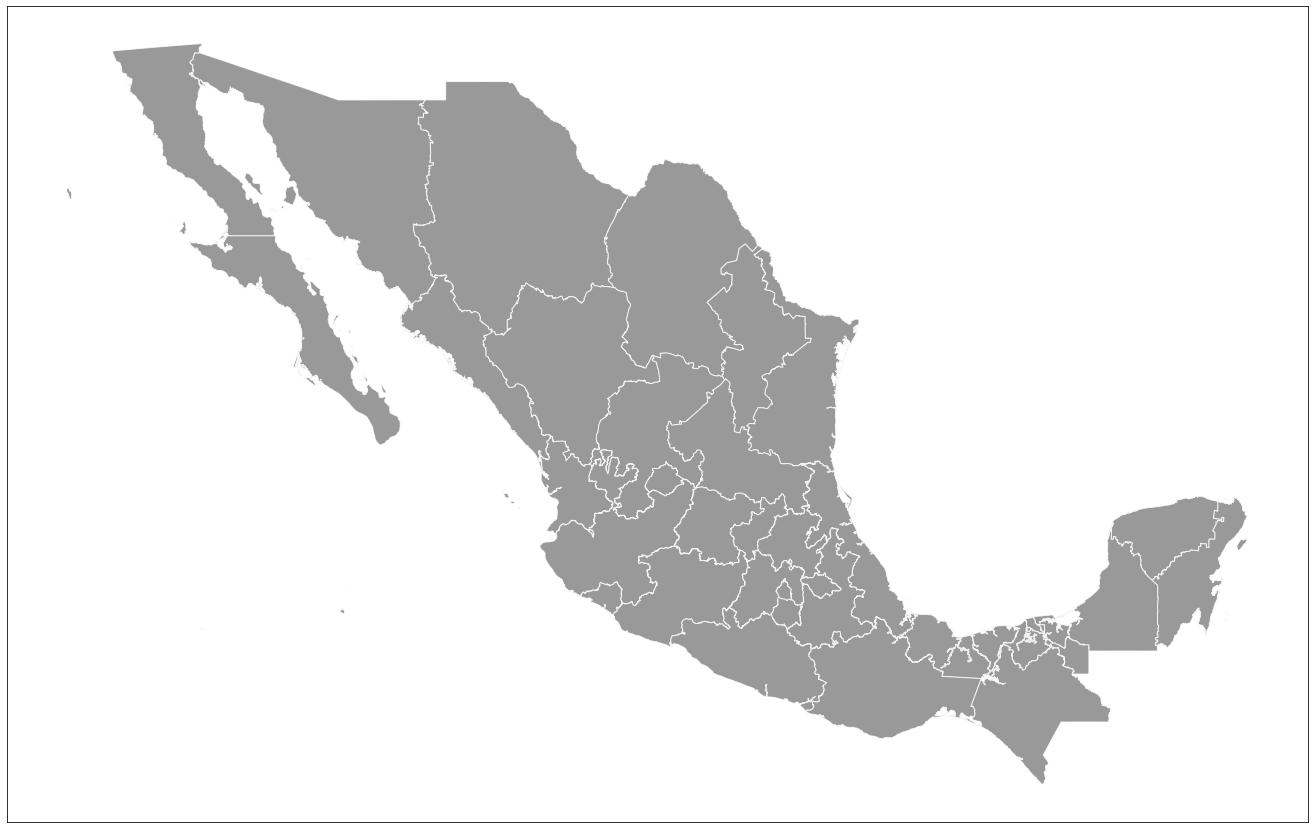

In [ ]:
#Creamos la figura con un tamaño definido
fig, ax = plt.subplots(figsize=(25,15))

mexico.plot(
            ax=ax,   #El eje donde graficaras pertenece al 
            alpha =0.8, #desvanecer el color de relleno
            edgecolor = "white",
            color="gray") 
#Eliminamos las etiquetas de los ejes y eliminamos los bordes de los ejes
ax.tick_params(
    axis='both', 
    bottom=False, 
    left=False,         
    labelbottom=False, 
    labelleft=False) 

# Map scatter plot

Leemos los datos almacenados en nuestros archivos excel con información de los PML promedio por zona de carga y las coordenadas de cada zona de carga.

In [ ]:
pml_df   = pd.read_excel('https://github.com/JAVerduzco/Mexico-s-energy-analysis-2020/raw/main/pmlzona.xlsx')
coord_df = pd.read_excel('https://github.com/JAVerduzco/Mexico-s-energy-analysis-2020/raw/main/coordenadas.xlsx')

Se selecciona una fecha para realizar el análisis.

In [ ]:
Fecha = '2020-02-11'

In [ ]:
# Filtramos los datos de la fecha seleccionada
pml_fecha = pml_df[pml_df['Fecha']==Fecha][['Zona','PML']]
pml_fecha

,Zona,PML
4141,ACAPULCO,1035.510833
4142,AGUASCALIENTES,692.822083
4143,APATZINGAN,763.601250
4144,CABORCA,185.391667
4145,CAMARGO,367.608333
...,...,...
4237,ZACAPU,734.039167
4238,ZACATECAS,689.118333
4239,ZAMORA,736.320833
4240,ZAPOTLAN,729.052917


Mediante la función ```pd.merge()``` podemos combinar nuestro dataframe ```coord```y el dataframe ```pml_dia```. Debemos tener toda esta información en un mismo dataframe

In [ ]:
coord_df


,Zona,Latitud,Longitud
0,CENTRO ORIENTE,20.116541,-98.741354
1,CENTRO SUR,19.292545,-99.656901
2,LAZARO CARDENAS,18.082542,-102.482672
3,VDM CENTRO,19.432299,-99.132391
4,VDM NORTE,19.478580,-99.232879
...,...,...,...
96,CHETUMAL,18.514587,-88.300553
97,MERIDA,20.967076,-89.623740
98,MOTUL TIZIMIN,20.690251,-88.201700
99,RIVIERA MAYA,20.630864,-87.077950


In [ ]:
map_df = pd.merge(coord_df,pml_fecha)
map_df

,Zona,Latitud,Longitud,PML
0,CENTRO ORIENTE,20.116541,-98.741354,609.893750
1,CENTRO SUR,19.292545,-99.656901,878.859583
2,LAZARO CARDENAS,18.082542,-102.482672,833.667500
3,VDM CENTRO,19.432299,-99.132391,1016.625417
4,VDM NORTE,19.478580,-99.232879,916.596667
...,...,...,...,...
96,CHETUMAL,18.514587,-88.300553,1582.461667
97,MERIDA,20.967076,-89.623740,1571.490417
98,MOTUL TIZIMIN,20.690251,-88.201700,1542.689583
99,RIVIERA MAYA,20.630864,-87.077950,1726.202917


En el siguiente bloque se crea una nueva columna en el dataframe map_df que asigna color de acuerdo al valor del PML.

In [ ]:
import numpy as np

#Creamos una serie de condiciones para asignar colores 
#de acuerdo al intervalo del PML en el que estan

conditions = [
    (map_df['PML'] <= 250),
    (map_df['PML'] >  250) & (map_df['PML'] <= 500),
    (map_df['PML'] >  500) & (map_df['PML'] <= 750),
    (map_df['PML'] >  750)
    ]

values = ['cyan','blue','orange','red']

map_df['color'] = np.select(conditions, values)
map_df

,Zona,Latitud,Longitud,PML,color
0,CENTRO ORIENTE,20.116541,-98.741354,609.893750,orange
1,CENTRO SUR,19.292545,-99.656901,878.859583,red
2,LAZARO CARDENAS,18.082542,-102.482672,833.667500,red
3,VDM CENTRO,19.432299,-99.132391,1016.625417,red
4,VDM NORTE,19.478580,-99.232879,916.596667,red
...,...,...,...,...,...
96,CHETUMAL,18.514587,-88.300553,1582.461667,red
97,MERIDA,20.967076,-89.623740,1571.490417,red
98,MOTUL TIZIMIN,20.690251,-88.201700,1542.689583,red
99,RIVIERA MAYA,20.630864,-87.077950,1726.202917,red


Por último creamos el mapa con los datos de PML, en la fecha elegida y con los colores asignados.

Text(0.5, 1.0, 'SIN - PML promedio 2020-02-11 (MXN/MWh)')

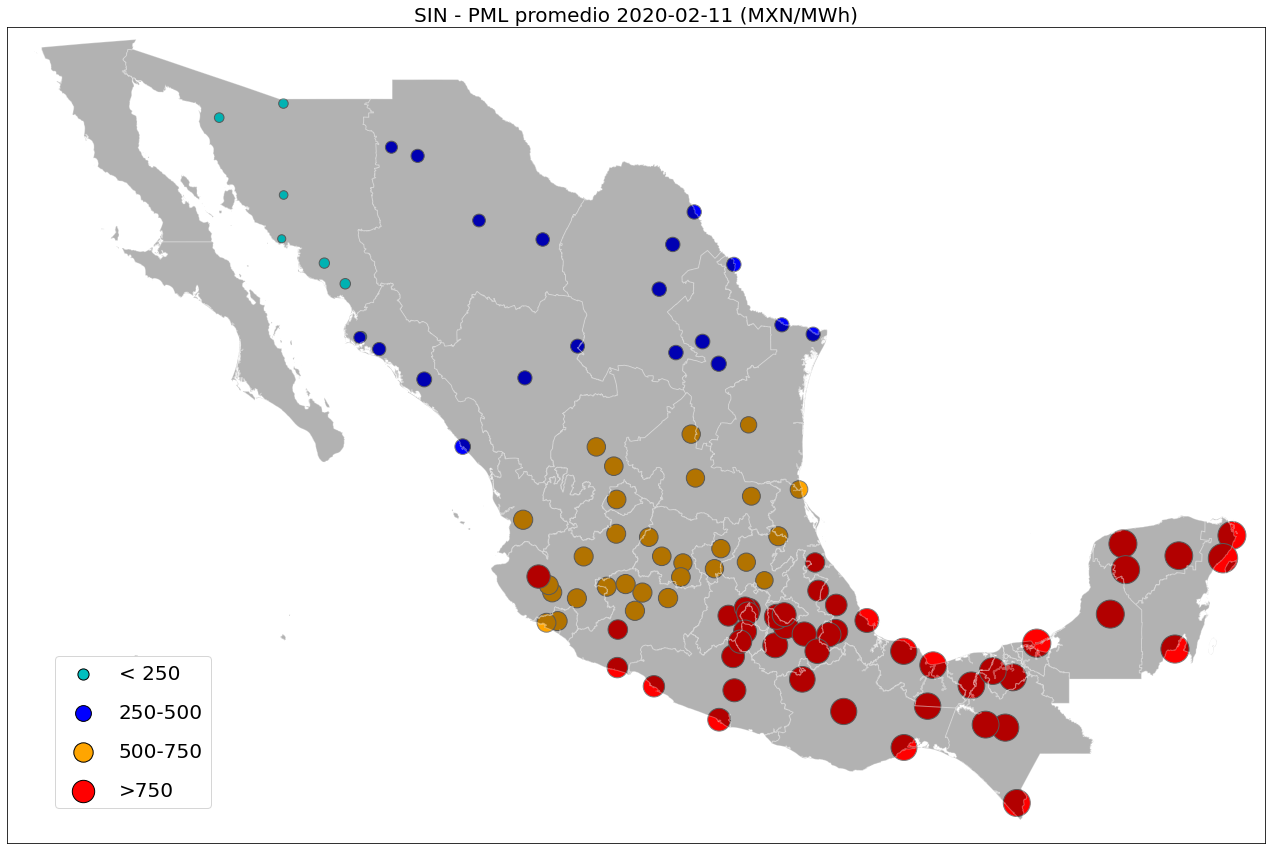

In [ ]:
#Creamos la figura indincando su tamaño
fig, ax = plt.subplots(figsize=(25,15))

scatter = ax.scatter(map_df['Longitud'],map_df['Latitud'], s=map_df['PML']/2, color= map_df['color'], edgecolors='gray')

mexico.plot(
            ax=ax,
            alpha =0.3,  #desvanecer el color de relleno
            edgecolor = "white",
            color="black") 

#Eliminamos las etiquetas de los ejes y eliminamos los bordes de los ejes
ax.tick_params(
    axis='both', 
    bottom=False, 
    left=False,         
    labelbottom=False, 
    labelleft=False) 

# Graficamos  puntos en las coordenadas (0,0) esto con el fin de 
# incluirlos en el Legend box. Estos puntos son los que aparecen 
# dentro del cuadro de leyenda. (Puntos fantasma)
ax.scatter([0], [0], c='c', alpha=1, s=250/2,
            label='< 250', edgecolor='black')
ax.scatter([0], [0], c='b', alpha=1, s=500/2,
            label='250-500', edgecolor='black')
ax.scatter([0], [0], c='orange', alpha=1, s=750/2,
            label='500-750', edgecolor='black')
ax.scatter([0], [0], c='red', alpha=1, s=1000/2,
            label='> 750', edgecolor='black')

# Sets figure limits
ax.set_xlim(-118,-86)
ax.set_ylim(14, 33)

#Configuramos el cuadro de leyenda
ax.legend(scatterpoints=1,
        labelspacing=1, loc='lower left', fontsize=20, 
        bbox_to_anchor=(0.03,0.03), title_fontsize=20) 

#Titulo de la grafica
ax.set_title('SIN - PML promedio {} (MXN/MWh)'.format(Fecha),fontsize=20)

In [ ]:
#Guardar copia de estea figura
os.chdir('..')
fig.savefig('pml.png')

# Choropleth map

Queremos crear un gráfico donde cada estado tenga asignado un color e intensidad de acuerdo a la cantidad de subestaciones de 400 kV que hay en ese estado. Accedemos a los datos desde un archivo en Github.

In [ ]:
nodos = pd.read_excel('https://github.com/JAVerduzco/Mexico-s-energy-analysis-2020/raw/main/Nodos.xlsx')

In [ ]:
nodos

In [ ]:
nodos.rename(columns={'ENTIDAD FEDERATIVA (INEGI)':'ENTIDAD'},inplace=True)
nodos_volt = nodos[nodos['NIVEL DE TENSIÓN (kV)'] == 400]
nodos_plot = nodos_volt.groupby(['ENTIDAD'])['NIVEL DE TENSIÓN (kV)'].count().reset_index()
nodos_plot

,ENTIDAD,NIVEL DE TENSIÓN (kV)
0,AGUASCALIENTES,1
1,CHIAPAS,3
2,COAHUILA DE ZARAGOZA,5
3,COLIMA,1
4,HIDALGO,1
5,JALISCO,3
6,MEXICO,1
7,MICHOACAN DE OCAMPO,2
8,MORELOS,1
9,NAYARIT,2


COmbinamos los dos datafames con la funcuón merge.

In [ ]:
df_combined = mexico.merge(nodos_plot,how='left')
df_combined

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry,NIVEL DE TENSIÓN (kV)
0,6.710632,22.081488,2,1,BAJA CALIFORNIA,Mexicali,None,02,"POLYGON ((-116.15195 32.61459, -116.13523 32.6...",NaN
1,16.687178,36.642330,3,2,SONORA,Hermosillo,None,26,"POLYGON ((-114.81361 32.49456, -114.81306 32.4...",1.0
2,0.000045,0.032972,4,3,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.29441 32.43412, -117.29514 32.4...",NaN
3,0.000004,0.008558,5,4,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.26293 32.42339, -117.26320 32.4...",NaN
4,0.000012,0.021596,6,5,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.25951 32.41480, -117.25991 32.4...",NaN
...,...,...,...,...,...,...,...,...,...,...
1208,0.000498,0.098991,1210,1209,CHIAPAS,None,ISLA,07,"POLYGON ((-92.82037 15.16438, -92.82115 15.164...",3.0
1209,0.000049,0.032163,1211,1210,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85334 15.16283, -92.85380 15.162...",3.0
1210,0.000006,0.009840,1212,1211,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85617 15.17170, -92.85710 15.171...",3.0
1211,0.000003,0.006575,1213,1212,CHIAPAS,None,ISLA,07,"POLYGON ((-92.77406 15.15408, -92.77421 15.154...",3.0


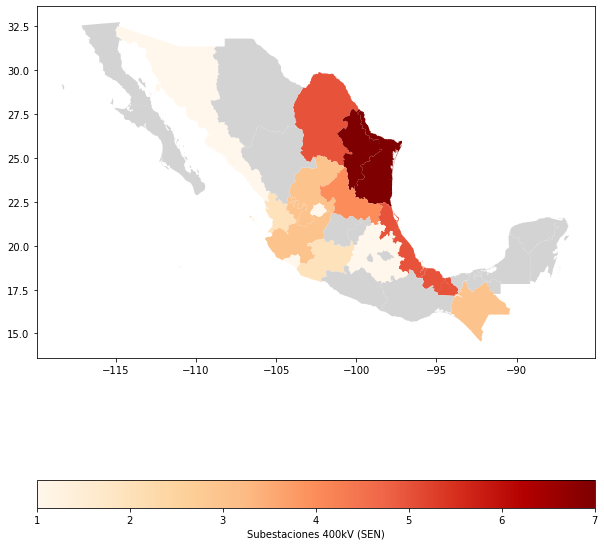

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))


df_combined.plot(
                column = 'NIVEL DE TENSIÓN (kV)', #la columna donde tenemos los datos a representar
                ax=ax, #grafica sobre ax
                cmap='OrRd',  #Color
                missing_kwds={'color':'lightgray'}, #Valores faltantes
                legend=True, #Mostrar cuadro de leyenda
                legend_kwds={'label':'Subestaciones 400kV (SEN)', #Cuadro de leyenda
                            'orientation':'horizontal'}
              )

# Crear animación en mapa

In [ ]:
# Libreria usada para hacer animaciones
import imageio as io


In [ ]:
# nos dirigimos al directorio donde tenemos nuestros datos geograficos
os.chdir('MexicoSHP2')

In [ ]:
#Leemos el archivo shp que es el formato geografico que utilizaremos
fp = 'destdv250k_2gw.shp'
mexico = gpd.read_file(fp)

In [ ]:
# Usaremos los siguientes dos dataframes previamente cargados
pml_df
coord_df


In [ ]:
#Necesitamos nuestros datos de fechas en formato de texto para que en cada
#iteracion podamos utilizarlo al escribir el titulo de la grafica
pml_df['Fecha'] = pml_df['Fecha'].dt.strftime('%Y-%m-%d')
pml_df

,Fecha,Zona,PML
0,2020-01-01,ACAPULCO,436.570833
1,2020-01-01,AGUASCALIENTES,314.476667
2,2020-01-01,APATZINGAN,341.145000
3,2020-01-01,CABORCA,203.472917
4,2020-01-01,CAMARGO,273.548750
...,...,...,...
36961,2020-12-31,ZACAPU,449.835833
36962,2020-12-31,ZACATECAS,434.239167
36963,2020-12-31,ZAMORA,449.855833
36964,2020-12-31,ZAPOTLAN,440.121250


In [ ]:
#Creamos una lista con los dias de operacion para iterar sobre ella
days_op = pml_df['Fecha'].unique()
days_op

In [ ]:


for day in days_op:
    
    #Filtramos los datos del dia de operacion 
    pml_zona = pml_df.loc[(pml_df['Fecha'] == day)][['Zona','PML']]
    
    #Hacemos union de pml_df y coord_df para tener todo en un dataframe
    map_df = pd.merge(coord_df, pml_zona)
    
    #Creamos una lista de condiciones para asignar un color de acuerdo al PML
    conditions = [
    (map_df['PML'] <= 250), (map_df['PML'] >  250) & (map_df['PML'] <= 500),
    (map_df['PML'] >  500) & (map_df['PML'] <= 750),
    (map_df['PML'] >  750)
    ]

    # Creamos la lista de asignaciones de color de acuerdo a las condiciones dadas
    values = ['cyan', 'blue', 'orange', 'red']

    # creamos una nueva columna y usamos np.select para asignar los valores condicionales
    map_df['color'] = np.select(conditions, values)
    print(day)    
    print(pml_zona.head())
    
    #Creamos la gráfica
    fig, ax = plt.subplots(figsize=(25,15))

    # Plot mexico shapefile
    mexico.plot(ax=ax,
                alpha=0.5,
                edgecolor='black',
                color='white')
    
    #Graficamos los puntos
    scatter = ax.scatter(map_df['Longitud'], map_df['Latitud'],  #Coordenadas (x,y)
                         s=map_df['PML'],   #s=size el tamaño del nodo = PML
                         color = map_df['color'], #color asignado
                         )
    
    #Removes ticks and labels for lat/lon
    ax.tick_params(
    axis='both', 
    bottom=False, 
    left=False,         
    labelbottom=False, 
    labelleft=False)

    # Grafica los puntos en las coordenadas (0,0) esto con el fin de 
    # incluirlos en el Legend box
    ax.scatter([0], [0], c='c', alpha=1, s=250,
                label='< 250', edgecolor='black')
    ax.scatter([0], [0], c='b', alpha=1, s=500,
                label='250-500', edgecolor='black') 
    ax.scatter([0], [0], c='orange', alpha=1, s=750,
                label='500-750', edgecolor='black')
    ax.scatter([0], [0], c='red', alpha=1, s=1000,
                label='> 750', edgecolor='black')

    #Sets figure limits
    ax.set_xlim(-118,-86)
    ax.set_ylim(14, 33)
        
    #Configuramos el cuadro de leyenda
    ax.legend(scatterpoints=1,
    labelspacing=1, loc='lower left', fontsize=20, 
    bbox_to_anchor=(0.03,0.03), title_fontsize=20) 
   
    #El Titulo de la gráfica
    plt.title('SIN - PML promedio - Día de Operación -' + day + '(MXN/MWh)', fontsize=30)
    
    #Guardamos la imagen
    filename = f'pml{day}'
    plt.savefig(filename,dpi=150)
    #Cerramos la figura
    plt.close('all')

#(ADAPTADO DE https://stackoverflow.com/questions/41228209/making-gif-fromimages-using-imageio-in-python)





In [ ]:
#Creamos una lista ordenada de las figuras a animar

file_names = ['pml' + days +'.png' for days in days_op]
file_names



In [ ]:
#USE IMAGE IO TO CREATE A GIF

with io.get_writer('pmlzone.gif', mode='I', duration=0.1) as writer:

   #ITERATE OVER FILENAMES

   for filename in file_names:

       #READ IN FILE

       image = io.imread(filename)
       #APPEND FILE TO GIF
       writer.append_data(image)

writer.close()


In [ ]:
#Eliminacion de las 366 imagenes
for filename in file_names:
   os.remove(filename)